Q1. What is Gradient Boosting Regression?

In [1]:
## Gradient Boosting Regresion is an ensemble learning technique which is used for Regression problems.
## In Gradient Boosting Regression, the weak learners are usually decision trees, also known as regression trees. 
## The algorithm works by minimizing a loss function, such as mean squared error or mean absolute error, to optimize the model's predictions. 
## The gradient descent optimization technique is used to update the model parameters and find the direction of steepest descent.

Q2. Implement a simple gradient boosting algorithm from scratch using Python and NumPy. Use a
simple regression problem as an example and train the model on a small dataset. Evaluate the model's
performance using metrics such as mean squared error and R-squared.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
tips=sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [9]:
df=tips.copy()

In [10]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [11]:
X=df.drop('tip',axis=1)
y=df['tip']

In [12]:
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4


In [13]:
cat_col=['sex','smoker','day','time']

In [18]:
X['sex']=encoder.fit_transform(X['sex'])

In [20]:
X['smoker']=encoder.fit_transform(X['smoker'])
X['day']=encoder.fit_transform(X['day'])
X['time']=encoder.fit_transform(X['time'])

In [21]:
X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4


In [22]:
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
GBR=GradientBoostingRegressor()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=45)

In [27]:
GBR.fit(X_train,y_train)

GradientBoostingRegressor()

In [29]:
y_pred=GBR.predict(X_test)
print("R2 Score :",r2_score(y_test,y_pred))
print("Mean Squared Error :",mean_squared_error(y_test,y_pred))

R2 Score : 0.13473230897792143
Mean Squared Error : 1.078584106157669


Q3. Experiment with different hyperparameters such as learning rate, number of trees, and tree depth to
optimise the performance of the model. Use grid search or random search to find the best
hyperparameters

In [30]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [31]:
parameter={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],'learning_rate':[.1,.05,.25],'n_estimators':[100,200,500],'max_depth':[2,3,5]}

In [32]:
grid_param=GridSearchCV(estimator=GBR,param_grid=parameter,cv=5,return_train_score=True)

In [33]:
grid_param.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.25],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [100, 200, 500]},
             return_train_score=True)

In [34]:
grid_param.best_params_

{'learning_rate': 0.1,
 'loss': 'absolute_error',
 'max_depth': 3,
 'n_estimators': 200}

In [35]:
grid_param.best_score_

0.4006729751735092

In [36]:
grid_param.best_estimator_

GradientBoostingRegressor(loss='absolute_error', n_estimators=200)

In [37]:
GBR=GradientBoostingRegressor(loss='absolute_error', n_estimators=200)

In [38]:
GBR.fit(X_train,y_train)
y_pred=GBR.predict(X_test)
print("R2 Score :",r2_score(y_test,y_pred))
print("Mean Squared Error :",mean_squared_error(y_test,y_pred))

R2 Score : 0.3653295088540959
Mean Squared Error : 0.791137253245466


Q4. What is a weak learner in Gradient Boosting?

In [40]:
## In Gradient Boosting, a weak learner refers to a base model that is used as a building block in the ensemble. 
## It is typically a simple and relatively weak predictive model, such as a decision tree with shallow depth or a linear model. 
## The key idea behind Gradient Boosting is to iteratively add weak learners, each trained to correct the mistakes of the previous learners, leading to an ensemble model with improved predictive performance

Q5. What is the intuition behind the Gradient Boosting algorithm?

In [41]:
## Start with a Simple Model: The algorithm begins with an initial simple model, often a constant value or the mean of the target variable.
## Iteratively Correct Errors: Compute the residuals, error
## The algorithm assigns higher weights to the examples that were previously mispredicted or have large residuals. 
## Combine Weak Learners: The predictions of all weak learners in the ensemble are combined to obtain the final prediction
## Gradient Descent Optimization: The key idea behind Gradient Boosting is to use the gradient descent optimization technique to update the model parameters.

Q6. How does Gradient Boosting algorithm build an ensemble of weak learners?

In [42]:
## Initialize the Ensemble: The algorithm starts by initializing the ensemble with a simple model, usually a constant value or the mean of the target variable. This serves as the initial prediction.

In [43]:
## Compute Residuals: The residuals are calculated as the differences between the actual target values and the predictions of the current ensemble.

In [44]:
## Train a Weak Learner: A weak learner, typically a decision tree, is trained to predict the residuals. The objective is to find the weak learner that minimizes the loss function when fitting the residuals. 

In [45]:
## Update the Ensemble: The predictions of the newly trained weak learner are added to the current ensemble's predictions. 
## This update is performed with a learning rate (or shrinkage parameter) that controls the contribution of each weak learner

In [46]:
## Repeat Steps 2-4: Steps 2 to 4 are repeated for a specified number of iterations or until a predefined stopping criterion is met. 
## In each iteration, the algorithm focuses on learning the residuals and updating the ensemble accordingly.

In [47]:
## Final Ensemble: The final ensemble is obtained by combining the predictions of all the weak learners in the ensemble

Q7. What are the steps involved in constructing the mathematical intuition of Gradient Boosting
algorithm?

In [48]:
## Steps are similar to answer of 5 and 6

## Final Output
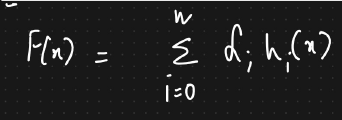

In [49]:
## Where alpha is the learning rate